![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
# import utils
from utils import evaluate, model_predict

In [5]:
# load the data
df = pd.read_csv('../../data/kc_house_data.csv')

# confirm load
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 21,597 house sale entries and 21 original features. A handful are objects, which would need to be handled as categorical feature. Some are coded as int64 or float64, but would need to be treated as categorical, such as zipcode.

In [7]:
# create df of predictors, X, and our target, y
X = df.drop('price', axis=1)
y = df['price']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

# create combined train and test dataframes
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [8]:
# inspect correlation of numeric columns with target, price
train_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.700481
sqft_above       0.602156
sqft_living15    0.586176
bathrooms        0.526186
lat              0.307136
bedrooms         0.302600
floors           0.257098
yr_renovated     0.134394
sqft_lot         0.092576
sqft_lot15       0.082877
yr_built         0.053602
long             0.022320
id              -0.017423
zipcode         -0.050696
Name: price, dtype: float64

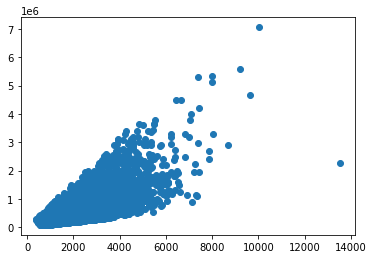

In [9]:
plt.scatter(X_train['sqft_living'], y_train);

In [10]:
sqft_model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train[['sqft_living']])).fit()
sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.560e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:50:11   Log-Likelihood:            -2.2506e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.048e+04   5093.800     -7.946      0.000   -5.05e+04   -3.05e+04
sqft_living   279.5054      2.238    124.908      0.000     275.119     283.892
==============================================================================
Omnibus:                    10616.296   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307216.140
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      23.634   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Metrics:
R2: 0.491
Mean Absolute Error: $174,106.670
Root Mean Squared Error: $262,026.176
----
Testing Metrics:
R2: 0.499
Mean Absolute Error: $172,458.097
Root Mean Squared Error: $260,554.070


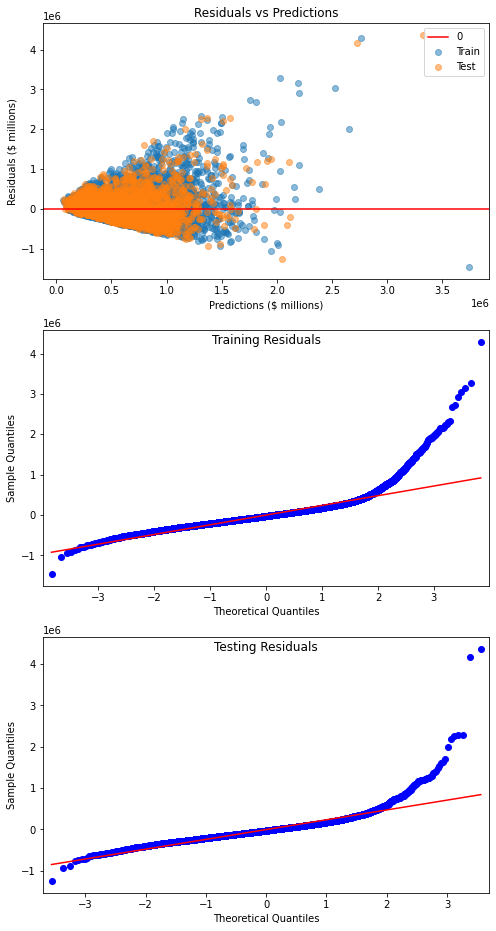

In [11]:
# predictions for train and test set
y_train_preds = sqft_model.predict(sm.add_constant(X_train[['sqft_living']]))
y_test_preds = sqft_model.predict(sm.add_constant(X_test[['sqft_living']]))

# evaluate the model
evaluate(y_train, y_train_preds, y_test, y_test_preds)

## Examine Price

In [12]:
y_train.describe()

count    1.619700e+04
mean     5.414816e+05
std      3.671641e+05
min      8.100000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.060000e+06
Name: price, dtype: float64

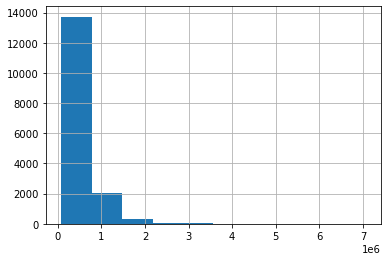

In [13]:
y_train.hist();

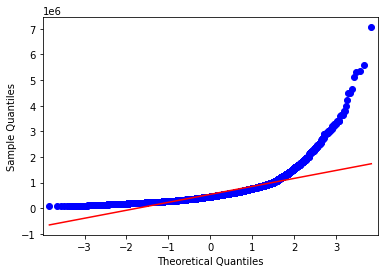

In [14]:
fig = sm.qqplot(y_train, line='r')

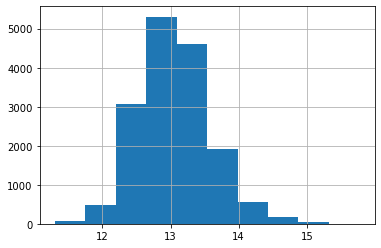

In [15]:
# log(1+price) transform
log_y_train = y_train.transform(np.log1p)
log_y_train.hist();

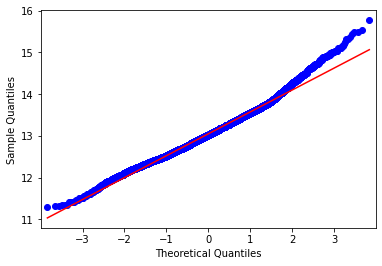

In [16]:
fig = sm.qqplot(log_y_train, line='r')

In [17]:
# add log(1+price) to dataframes and reassign targets
train_df['log1p_price'] = log_y_train
log_y_test = y_test.transform(np.log1p)
test_df['log1p_price'] = log_y_test

# take a look
train_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,log1p_price
6465,4139480190,9/16/2014,3,3.25,3780,10623,1.0,NO,FAIR,Average,...,1130.0,1999,0.0,98006,47.5506,-122.101,3850,11170,1150000.0,13.955273
10332,1172000135,7/31/2014,4,2.00,1940,6350,1.0,NO,NONE,Good,...,970.0,1951,NaN,98103,47.6948,-122.357,960,6350,446000.0,13.008076
17878,7454001210,6/3/2014,3,1.00,1040,6860,2.0,NO,NONE,Average,...,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512,239000.0,12.384223
18830,686530530,8/4/2014,5,1.75,2510,9750,1.5,NO,NONE,Average,...,0.0,1969,NaN,98052,47.6635,-122.149,1900,9750,570000.0,13.253393
12147,5095401360,11/21/2014,3,2.50,2080,16050,1.0,NO,NONE,Very Good,...,720.0,1978,0.0,98059,47.4694,-122.069,1790,14550,418000.0,12.943239


In [18]:
train_df.corr()[['log1p_price', 'price']].sort_values('log1p_price', ascending=False)

,log1p_price,price
log1p_price,1.000000,0.894387
price,0.894387,1.000000
sqft_living,0.696162,0.700481
sqft_living15,0.618865,0.586176
sqft_above,0.599192,0.602156
bathrooms,0.554410,0.526186
lat,0.448560,0.307136
bedrooms,0.339156,0.302600
floors,0.311861,0.257098
yr_renovated,0.123572,0.134394


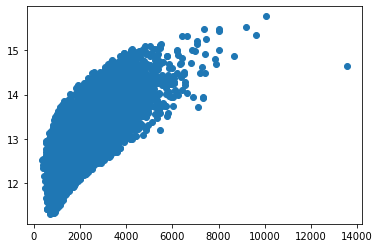

In [19]:
plt.scatter(X_train['sqft_living'], log_y_train);

In [20]:
sqft_model = sm.OLS(endog=log_y_train, exog=sm.add_constant(X_train[['sqft_living']])).fit()
sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:50:13   Log-Likelihood:                -7249.6
No. Observations:               16197   AIC:                         1.450e+04
Df Residuals:                   16195   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2193      0.007   1660.355      0.000      12.205      12.234
sqft_living     0.0004   3.23e-06    123.409      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.316   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                1.294
Skew:                           0.021   Prob(JB):                        0.524
Kurtosis:                       3.015   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Metrics:
R2: 0.485
Mean Absolute Error: $0.307
Root Mean Squared Error: $0.379
----
Testing Metrics:
R2: 0.479
Mean Absolute Error: $0.307
Root Mean Squared Error: $0.378


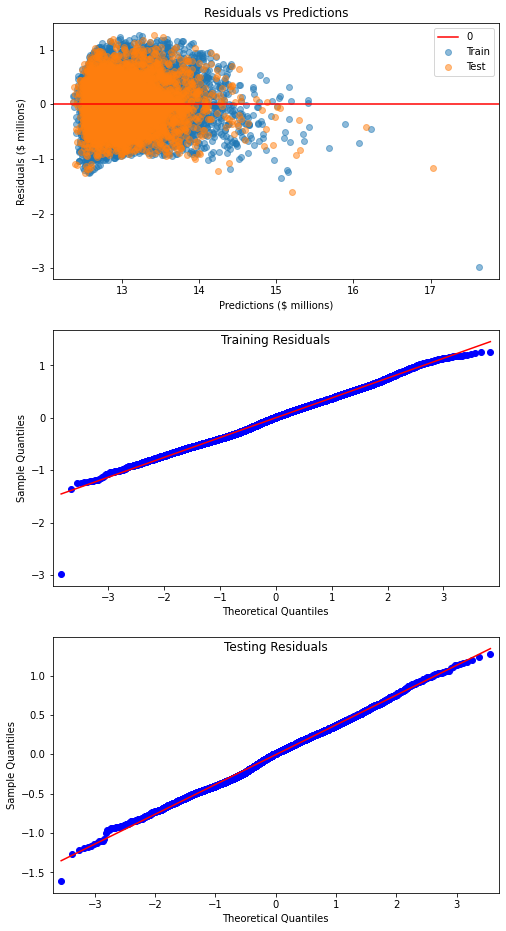

In [21]:
# predictions for train and test set
y_train_preds = sqft_model.predict(sm.add_constant(X_train[['sqft_living']]))
y_test_preds = sqft_model.predict(sm.add_constant(X_test[['sqft_living']]))

# evaluate the model
evaluate(log_y_train, y_train_preds, log_y_test, y_test_preds)

## Examine `sqft_living` and `sqft_living15`

In [22]:
X_train['sqft_living'].describe()

count    16197.000000
mean      2082.103229
std        920.166475
min        370.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

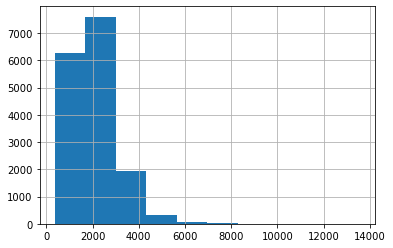

In [23]:
X_train['sqft_living'].hist();

In [24]:
q99 = X_train['sqft_living'].quantile(0.99)
q95 = X_train['sqft_living'].quantile(0.95)
q90 = X_train['sqft_living'].quantile(0.90)

no_q99 = len(X_train[X_train['sqft_living'] > q99])
no_q95 = len(X_train[X_train['sqft_living'] > q95])
no_q90 = len(X_train[X_train['sqft_living'] > q90])

print(f"q99: {no_q99} houses above {q99:.0f} square feet")
print(f"q95: {no_q95} houses above {q95:.0f} square feet")
print(f"q90: {no_q90} houses above {q90:.0f} square feet")

q99: 162 houses above 4981 square feet
q95: 806 houses above 3770 square feet
q90: 1618 houses above 3260 square feet


In [25]:
X_train['sqft_living15'].describe()

count    16197.000000
mean      1988.743348
std        688.273221
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64

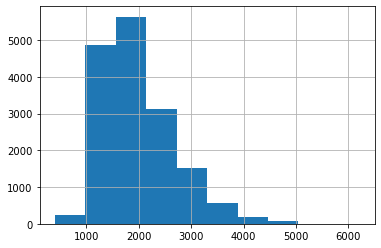

In [26]:
X_train['sqft_living15'].hist();

In [27]:
# create new column to compare square footage of house to 15 nearest neighbors
X_train['ratio_sqft_living'] = X_train['sqft_living'] / X_train['sqft_living15']
X_train.head()

<ipython-input-27-42f32dbb8e49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ratio_sqft_living'] = X_train['sqft_living'] / X_train['sqft_living15']


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ratio_sqft_living
6465,4139480190,9/16/2014,3,3.25,3780,10623,1.0,NO,FAIR,Average,...,2650,1130.0,1999,0.0,98006,47.5506,-122.101,3850,11170,0.981818
10332,1172000135,7/31/2014,4,2.00,1940,6350,1.0,NO,NONE,Good,...,970,970.0,1951,NaN,98103,47.6948,-122.357,960,6350,2.020833
17878,7454001210,6/3/2014,3,1.00,1040,6860,2.0,NO,NONE,Average,...,1040,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512,1.009709
18830,686530530,8/4/2014,5,1.75,2510,9750,1.5,NO,NONE,Average,...,2510,0.0,1969,NaN,98052,47.6635,-122.149,1900,9750,1.321053
12147,5095401360,11/21/2014,3,2.50,2080,16050,1.0,NO,NONE,Very Good,...,1360,720.0,1978,0.0,98059,47.4694,-122.069,1790,14550,1.162011


In [28]:
X_train['ratio_sqft_living'].describe()

count    16197.000000
mean         1.052481
std          0.320178
min          0.187279
25%          0.881279
50%          1.000000
75%          1.157676
max          6.000000
Name: ratio_sqft_living, dtype: float64

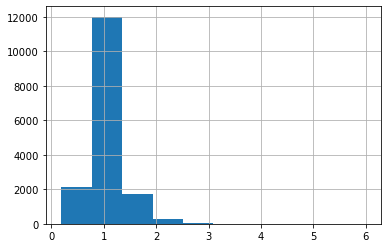

In [29]:
X_train['ratio_sqft_living'].hist();

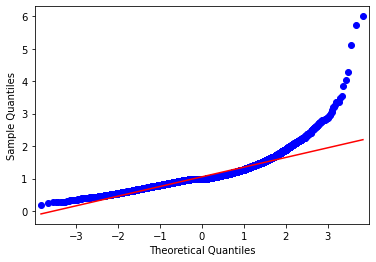

In [30]:
fig = sm.qqplot(X_train['ratio_sqft_living'], line='r')

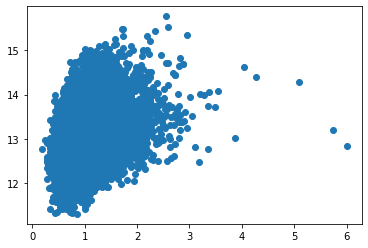

In [31]:
plt.scatter(X_train['ratio_sqft_living'], log_y_train);

In [32]:
len(X_train[X_train['ratio_sqft_living'] >= 3])

17

In [33]:
# add ratio_sqft_living to dataframes
train_df['ratio_sqft_living'] = X_train['ratio_sqft_living']
X_test['ratio_sqft_living'] = X_test['sqft_living'] / X_test['sqft_living15']
test_df['ratio_sqft_living'] = X_test['ratio_sqft_living']

# remove outliers at >=3x ratio
train_df = train_df[train_df['ratio_sqft_living'] < 3]
test_df = test_df[test_df['ratio_sqft_living'] < 3]
X_train = train_df.drop(columns=['price', 'log1p_price'])
X_test = test_df.drop(columns=['price', 'log1p_price'])

# take a look
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 6465 to 14000
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16180 non-null  int64  
 1   date               16180 non-null  object 
 2   bedrooms           16180 non-null  int64  
 3   bathrooms          16180 non-null  float64
 4   sqft_living        16180 non-null  int64  
 5   sqft_lot           16180 non-null  int64  
 6   floors             16180 non-null  float64
 7   waterfront         14393 non-null  object 
 8   view               16133 non-null  object 
 9   condition          16180 non-null  object 
 10  grade              16180 non-null  object 
 11  sqft_above         16180 non-null  int64  
 12  sqft_basement      16180 non-null  object 
 13  yr_built           16180 non-null  int64  
 14  yr_renovated       13298 non-null  float64
 15  zipcode            16180 non-null  int64  
 16  lat                

<ipython-input-33-f522565a562b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ratio_sqft_living'] = X_test['sqft_living'] / X_test['sqft_living15']


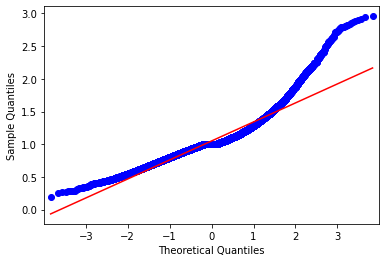

In [34]:
fig = sm.qqplot(X_train['ratio_sqft_living'], line='r')

In [35]:
train_df.corr()['log1p_price'].sort_values(ascending=False)

log1p_price          1.000000
price                0.894170
sqft_living          0.695705
sqft_living15        0.621146
sqft_above           0.598481
bathrooms            0.553267
lat                  0.448961
bedrooms             0.338639
ratio_sqft_living    0.312422
floors               0.311111
yr_renovated         0.124159
sqft_lot             0.096296
sqft_lot15           0.088847
yr_built             0.077899
long                 0.050383
id                  -0.003330
zipcode             -0.036518
Name: log1p_price, dtype: float64

In [36]:
ratio_model = sm.OLS(endog=train_df['log1p_price'], exog=sm.add_constant(train_df[['ratio_sqft_living']])).fit()
ratio_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log1p_price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1750.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:50:16   Log-Likelihood:                -11760.
No. Observations:               16180   AIC:                         2.352e+04
Df Residuals:                   16178   BIC:                         2.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4850      0.014    888.258      0.000      12.457      12.513
ratio_sqft_living     0.5378      0.013     41.832      0.000       0.513       0.563
==============================================================================
Omnibus:                      384.218   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.077
Skew:                           0.344   Prob(JB):                     1.23e-95
Kurtosis:                       3.419   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Training Metrics:
R2: 0.098
Mean Absolute Error: $0.395
Root Mean Squared Error: $0.501
----
Testing Metrics:
R2: 0.087
Mean Absolute Error: $0.397
Root Mean Squared Error: $0.500


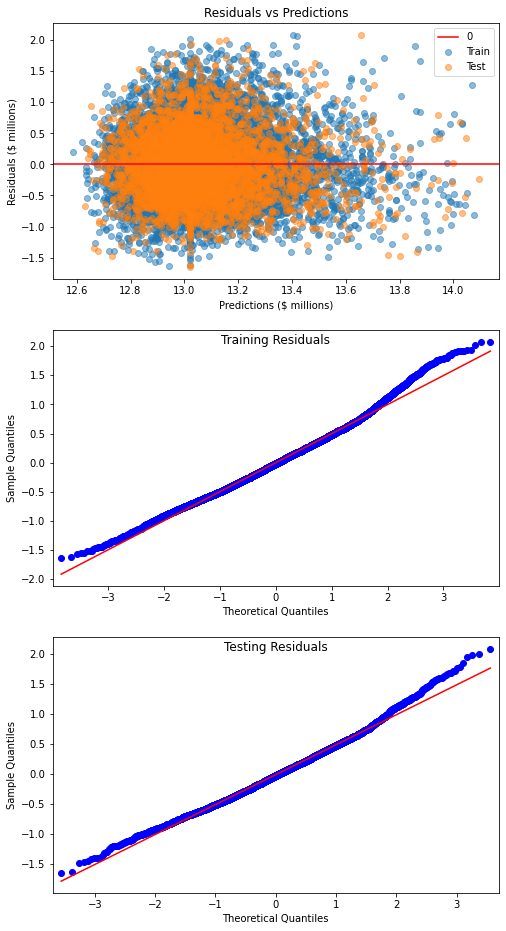

In [37]:
# predictions for train and test set
y_train_preds = ratio_model.predict(sm.add_constant(train_df[['ratio_sqft_living']]))
y_test_preds = ratio_model.predict(sm.add_constant(test_df[['ratio_sqft_living']]))

# evaluate the model
evaluate(train_df['log1p_price'], y_train_preds, test_df['log1p_price'], y_test_preds)

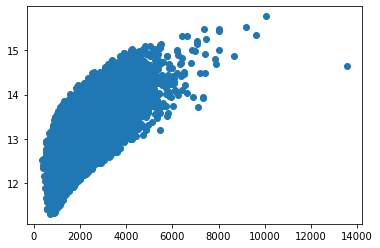

In [38]:
plt.scatter(train_df['sqft_living'], train_df['log1p_price']);

In [39]:
len(train_df[train_df['sqft_living'] >= 6000])

48

In [40]:
# remove houses >= 6000 square feet
train_df = train_df[train_df['sqft_living'] < 6000]
test_df = test_df[test_df['sqft_living'] < 6000]

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16132 entries, 6465 to 14000
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16132 non-null  int64  
 1   date               16132 non-null  object 
 2   bedrooms           16132 non-null  int64  
 3   bathrooms          16132 non-null  float64
 4   sqft_living        16132 non-null  int64  
 5   sqft_lot           16132 non-null  int64  
 6   floors             16132 non-null  float64
 7   waterfront         14346 non-null  object 
 8   view               16086 non-null  object 
 9   condition          16132 non-null  object 
 10  grade              16132 non-null  object 
 11  sqft_above         16132 non-null  int64  
 12  sqft_basement      16132 non-null  object 
 13  yr_built           16132 non-null  int64  
 14  yr_renovated       13262 non-null  float64
 15  zipcode            16132 non-null  int64  
 16  lat                

In [41]:
train_df[['sqft_living', 'ratio_sqft_living']].corr()

,sqft_living,ratio_sqft_living
sqft_living,1.000000,0.560979
ratio_sqft_living,0.560979,1.000000


In [42]:
multi_model = sm.OLS(endog=train_df['log1p_price'],
                     exog=sm.add_constant(train_df[['ratio_sqft_living', 'sqft_living']])).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log1p_price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     7603.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:50:17   Log-Likelihood:                -6966.0
No. Observations:               16132   AIC:                         1.394e+04
Df Residuals:                   16129   BIC:                         1.396e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.3478      0.011   1153.524      0.000      12.327      12.369
ratio_sqft_living    -0.2295      0.012    -19.525      0.000      -0.253      -0.206
sqft_living           0.0005   4.06e-06    111.744      0.000       0.000       0.000
==============================================================================
Omnibus:                       84.141   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.463
Skew:                           0.043   Prob(JB):                     2.73e-14
Kurtosis:                       2.708   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Metrics:
R2: 0.485
Mean Absolute Error: $0.304
Root Mean Squared Error: $0.373
----
Testing Metrics:
R2: 0.482
Mean Absolute Error: $0.303
Root Mean Squared Error: $0.371


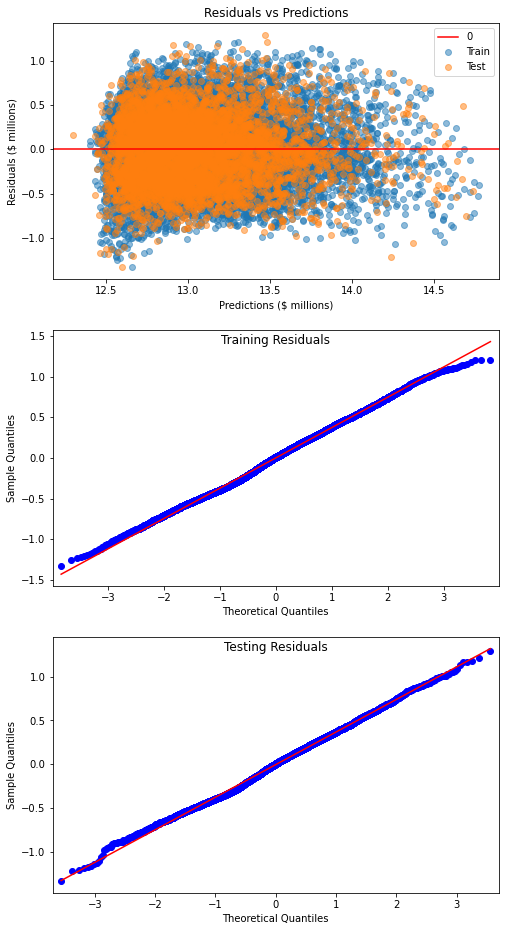

In [43]:
# predictions for train and test set
y_train_preds = multi_model.predict(sm.add_constant(train_df[['ratio_sqft_living', 'sqft_living']]))
y_test_preds = multi_model.predict(sm.add_constant(test_df[['ratio_sqft_living', 'sqft_living']]))

# evaluate the model
evaluate(train_df['log1p_price'], y_train_preds, test_df['log1p_price'], y_test_preds)

## Examine `sqft_basement`

In [44]:
train_df['sqft_basement'].describe()

count     16132
unique      261
top         0.0
freq       9642
Name: sqft_basement, dtype: object

In [45]:
train_df['sqft_basement'].value_counts()

0.0       9642
?          346
700.0      159
500.0      156
600.0      154
          ... 
1770.0       1
2570.0       1
1548.0       1
2300.0       1
1852.0       1
Name: sqft_basement, Length: 261, dtype: int64

In [46]:
# check for difference in above and total square footage for those with '?' for sqft_basement
basement_miss = train_df[train_df['sqft_basement'] == '?'][['sqft_above', 'sqft_living']]
basement_miss

,sqft_above,sqft_living
6984,1020,1720
79,3450,3450
15477,2330,2330
14701,1840,1840
14483,1770,1770
...,...,...
21365,820,820
1356,1200,1200
881,1800,1800
17717,1520,1890


In [47]:
# the number of '?' which have a difference, which we assume means have a basement
sum(basement_miss['sqft_above'] != basement_miss['sqft_living'])

123

Out of 346 '?', there are 123 that appear to have a basement and 223 that don't. That brings the total to 9,642 + 223 = 9,865 houses out 16,132 houses in the training set without a basement according to `sqft_basement`. Let's see if this aligns with the following method of determing whether a house has a basement.

In [48]:
# find the difference in total and above square footage as an indicator of having a basement
train_df['sqft_diff'] = train_df['sqft_living'] - train_df['sqft_above']

# set new feature equal to 1 for basement, 0 for no basement
train_df['has_basement'] = np.where(train_df['sqft_diff'] > 0, 1, 0)

# check how many don't have a basement
sum(train_df['has_basement'] == 0)

9865

There are 9,865 houses without a basement according to this method as well! Let's try adding this `has_basement` feature to our linear regression model.

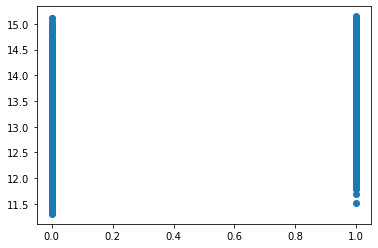

In [49]:
# update the test set with the new feature
test_df['sqft_diff'] = test_df['sqft_living'] - test_df['sqft_above']
test_df['has_basement'] = np.where(test_df['sqft_diff'] > 0, 1, 0)

# check scatter plot of has_basement to log1p_price
plt.scatter(train_df['has_basement'], train_df['log1p_price']);

In [50]:
train_df[['sqft_living', 'ratio_sqft_living', 'has_basement', 'log1p_price']].corr()

,sqft_living,ratio_sqft_living,has_basement,log1p_price
sqft_living,1.000000,0.560979,0.198255,0.687817
ratio_sqft_living,0.560979,1.000000,0.265005,0.294540
has_basement,0.198255,0.265005,1.000000,0.213981
log1p_price,0.687817,0.294540,0.213981,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log1p_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5283.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:50:28   Log-Likelihood:                -6801.5
No. Observations:               16132   AIC:                         1.361e+04
Df Residuals:                   16128   BIC:                         1.364e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.3563      0.011   1164.998      0.000      12.335      12.377
sqft_living           0.0004   4.03e-06    111.536      0.000       0.000       0.000
ratio_sqft_living    -0.2704      0.012    -22.822      0.000      -0.294      -0.247
has_basement          0.1129      0.006     18.230      0.000       0.101       0.125
==============================================================================
Omnibus:                       38.467   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.003
Skew:                           0.040   Prob(JB):                     1.12e-07
Kurtosis:                       2.797   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Metrics:
R2: 0.496
Mean Absolute Error: $0.300
Root Mean Squared Error: $0.369
----
Testing Metrics:
R2: 0.487
Mean Absolute Error: $0.300
Root Mean Squared Error: $0.370


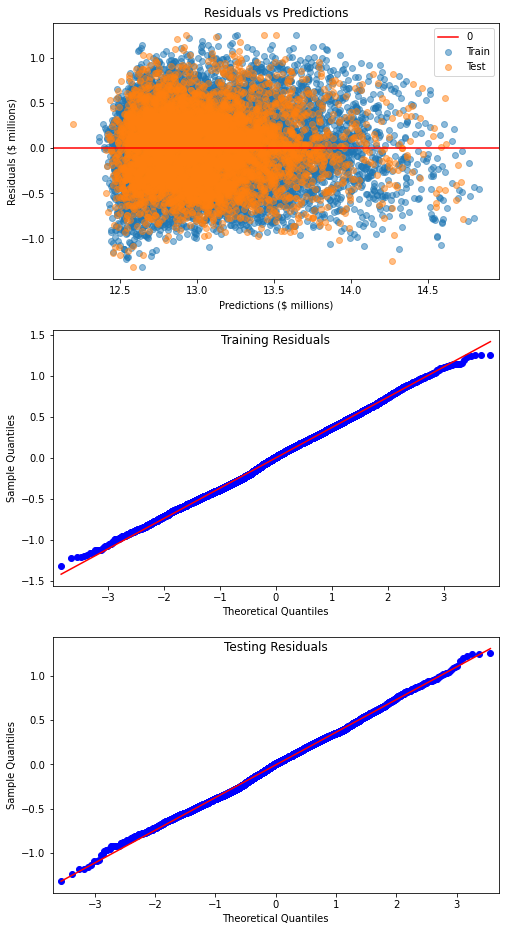

In [51]:
# predictions for train and test set
y_train_preds, y_test_preds = model_predict(train_df,
                                            ['sqft_living', 'ratio_sqft_living', 'has_basement'],
                                            'log1p_price',
                                            test_df)

# evaluate the model
evaluate(train_df['log1p_price'], y_train_preds, test_df['log1p_price'], y_test_preds)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
